# AVL Tree

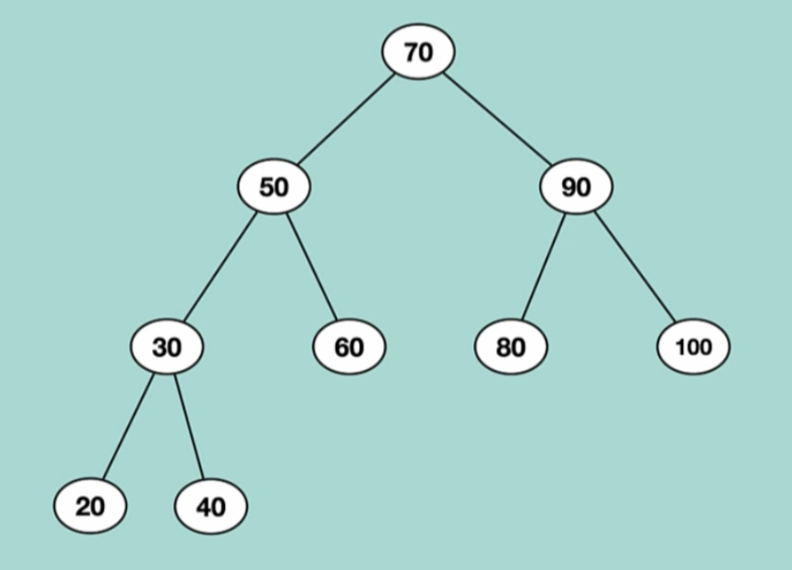

## Properties
- self balancing binary search tree (all properties of BST hold)
- the difference between the heights of the left and right subtree of each node can never be more than one for all nodes
    - if this condition is violated for any node, then we do a rotation
- the purpose of an AVL tree is to avoid the degenerate case where a BST becomes a list and operations become O(n)
    - the worst case and the average case for search, insert, delete, now become O(log(n))
    - not possible to have a worst case of O(n) like it is for a regular BST
- rotations:
    - Must determine the condition by finding the path from the unbalanced node to the leaf node
    - Left left Condition
        - do a right rotation: 
            - root becomes right child
            - left child becomes parent
            - left grandchild becomes left child
    - Left Right Condition
        - must do a left rotation then a right rotation
            - left child of root becomes left child of right child of left child
            - right child of left child becomes left child of root
            - root becomes right child
            - new left child becomes root
            - new left grandchild becomes left child
    - Right Right Condition
        - must do a left rotation
            - root becomes left child
            - right child becomes root
            - right grandchild becomes right child
    - Right Left Condition
        - must do a right rotation then a left rotation
            - right child of root becomes the right child of left child of right child
            - left child of right child becomes the right child of root
            - root becomes left child
            - new right child becomes root
            - new right grandchild becomes right child of root

## AVL Node implementation
- class to represent AVL nodes and independent methods that operate on a root AVL node

In [69]:
from collections import deque

In [78]:
class AVLNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.height = 1

def preorder_traversal(root):
    if not root:
        return
    print(root.data)
    preorder_traversal(root.left)
    preorder_traversal(root.right)

def inorder_traversal(root):
    if not root:
        return
    inorder_traversal(root.left)
    print(root.data)
    inorder_traversal(root.right)

def reverseorder_traversal(root):
    if not root:
        return
    reverseorder_traversal(root.right)
    print(root.data)
    reverseorder_traversal(root.left)

def postorder_traversal(root):
    if not root:
        return
    postorder_traversal(root.left)
    postorder_traversal(root.right)
    print(root.data)

def levelorder_traversal(root):
    if not root:
        return
    q = deque()
    q.appendleft(root)
    while len(q) > 0:
        curr = q.pop()
        print(curr.data)
        if curr.left is not None:
            q.appendleft(curr.left)
        if curr.right is not None:
            q.appendleft(curr.right)

def search(root, value):
    if root is None:
        return False
    elif root.data == value:
        return True
    elif value < root.data:
        if root.left.data == value:
            return True
        else:
            return search(root.left, value)
    else:
        if root.right.data == value:
            return True
        else:
            return search(root.right, value)

def get_height(root):
    if not root:
        return 0
    else:
        return root.height

def right_rotate(unbalanced_node):
    new_root = unbalanced_node.left
    unbalanced_node.left = unbalanced_node.left.right
    new_root.right = unbalanced_node
    unbalanced_node.height = 1 + max(get_height(unbalanced_node.left), get_height(unbalanced_node.right))
    new_root.height = 1 + max(get_height(new_root.left), get_height(new_root.right))
    return new_root

def left_rotate(unbalanced_node):
    new_root = unbalanced_node.right
    unbalanced_node.right = unbalanced_node.right.left
    new_root.left = unbalanced_node
    unbalanced_node.height = 1 + max(get_height(unbalanced_node.left), get_height(unbalanced_node.right))
    new_root.height = 1 + max(get_height(new_root.left), get_height(new_root.right))
    return new_root

def get_balance(root):
    if not root:
        return 0
    return get_height(root.left) - get_height(root.right)

def insert(root, value):
    if not root:
        return AVLNode(value)
    elif value < root.data:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    
    root.height = 1 + max(get_height(root.left), get_height(root.right))
    balance = get_balance(root)
    if balance > 1 and value < root.left.data: # left left condition
        return right_rotate(root)
    if balance > 1 and value > root.left.data: # left right condition
        root.left = left_rotate(root.left)
        return right_rotate(root)
    if balance < -1 and value > root.right.data: # right right condition
        return left_rotate(root)
    if balance < -1 and value < root.right.data: # right left condition
        root.right = right_rotate(root.right)
        return left_rotate(root)
    return root

def get_min_value_node(root):
    if root is None or root.left is None:
        return root
    else:
        return get_min_value_node(root.left)
    
def get_max_value_node(root):
    if root is None or root.right is None:
        return root
    else:
        return get_max_value_node(root.right)

def delete_node(root, value):
    if not root:
        return root
    elif value < root.data:
        root.left = delete_node(root.left, value)
    elif value > root.data:
        root.right = delete_node(root.right, value)
    else:
        if root.left is None:
            temp = root.right
            root = None
            return temp
        elif root.right is None:
            temp = root.left
            root = None
            return temp
        temp = get_min_value_node(root.right)
        root.data = temp.data
        root.right = delete_node(root.right, temp.data)
    balance = get_balance(root)
    if balance > 1 and get_balance(root.left) >= 0: 
        return right_rotate(root)
    if balance < -1 and get_balance(root.right) <= 0:
        return left_rotate(root)
    if balance > 1 and get_balance(root.left) < 0:
        root.left = left_rotate(root.left)
        return right_rotate(root)
    if balance < -1 and get_balance(root.right) > 0:
        root.right = right_rotate(root.right)
        return left_rotate(root)
    return root

def delete_avl(root):
    root.left = None
    root.right = None
    root.data = None
    

            

In [81]:
avl = AVLNode(10)
avl = insert(avl, 5)
avl = insert(avl, 15)
avl = insert(avl, 3)
avl = insert(avl, 7)
levelorder_traversal(avl)

10
5
15
3
7


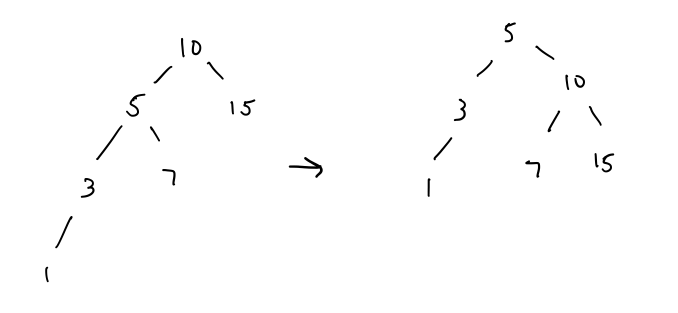

In [82]:
avl = insert(avl, 1)
levelorder_traversal(avl)

5
3
10
1
7
15


## Separate Classes Implementation
- all methods are class methods of a AVL tree class rather than independent methods that operate on an AVLNode object
- must pass root to methods as a parameter

In [118]:
from collections import deque
import sys

In [135]:
class TreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1


class AVLTree(object):

    # Function to insert a node
    def insert_node(self, root, key):

        # Find the correct location and insert the node
        if not root:
            return TreeNode(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)

        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        return root

    # Function to delete a node
    def delete_node(self, root, key):

        # Find the node to be deleted and remove it
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,
                                          temp.key)
        if root is None:
            return root

        # Update the balance factor of nodes
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        balanceFactor = self.getBalance(root)

        # Balance the tree
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root

    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    def preOrder(self, root):
        if not root:
            return
        print("{0} ".format(root.key), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)
    
    def inOrder(self, root):
        if not root:
            return
        self.inOrder(root.left)
        print("{0} ".format(root.key), end="")
        self.inOrder(root.right)
    
    def reverseOrder(self, root):
        if not root:
            return
        self.reverseOrder(root.right)
        print("{0} ".format(root.key), end="")
        self.reverseOrder(root.left)
    
    def postOrder(self, root):
        if not root:
            return
        self.postOrder(root.left)
        self.postOrder(root.right)
        print("{0} ".format(root.key), end="")
        
    def levelOrder(self, root):
        if not root:
            return
        q = deque()
        q.appendleft(root)
        while len(q) > 0:
            head = q.pop()
            print("{0} ".format(head.key), end="")
            if head.left is not None:
                q.appendleft(head.left)
            if head.right is not None:
                q.appendleft(head.right)
            
        

    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            print(currPtr.key)
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)

In [137]:
myTree = AVLTree()
root = None
nums = [33, 13, 52, 9, 21, 61, 8, 11]
for num in nums:
    root = myTree.insert_node(root, num)
myTree.printHelper(root, "", True)
print("\nDelete 13 \n")
key = 13
root = myTree.delete_node(root, key)
print("After Deletion: \n")
myTree.printHelper(root, "", True)
print("Traversals\n")
myTree.preOrder(root)
print("")
myTree.inOrder(root)
print("")
myTree.reverseOrder(root)
print("")
myTree.postOrder(root)
print("")
myTree.levelOrder(root)

R----33
     L----13
     |    L----9
     |    |    L----8
     |    |    R----11
     |    R----21
     R----52
          R----61

Delete 13 

After Deletion: 

R----33
     L----9
     |    L----8
     |    R----21
     |         L----11
     R----52
          R----61
Traversals

33 9 8 21 11 52 61 
8 9 11 21 33 52 61 
61 52 33 21 11 9 8 
8 11 21 9 61 52 33 
33 9 52 8 21 61 11 

In [138]:
b.right.right.data

15

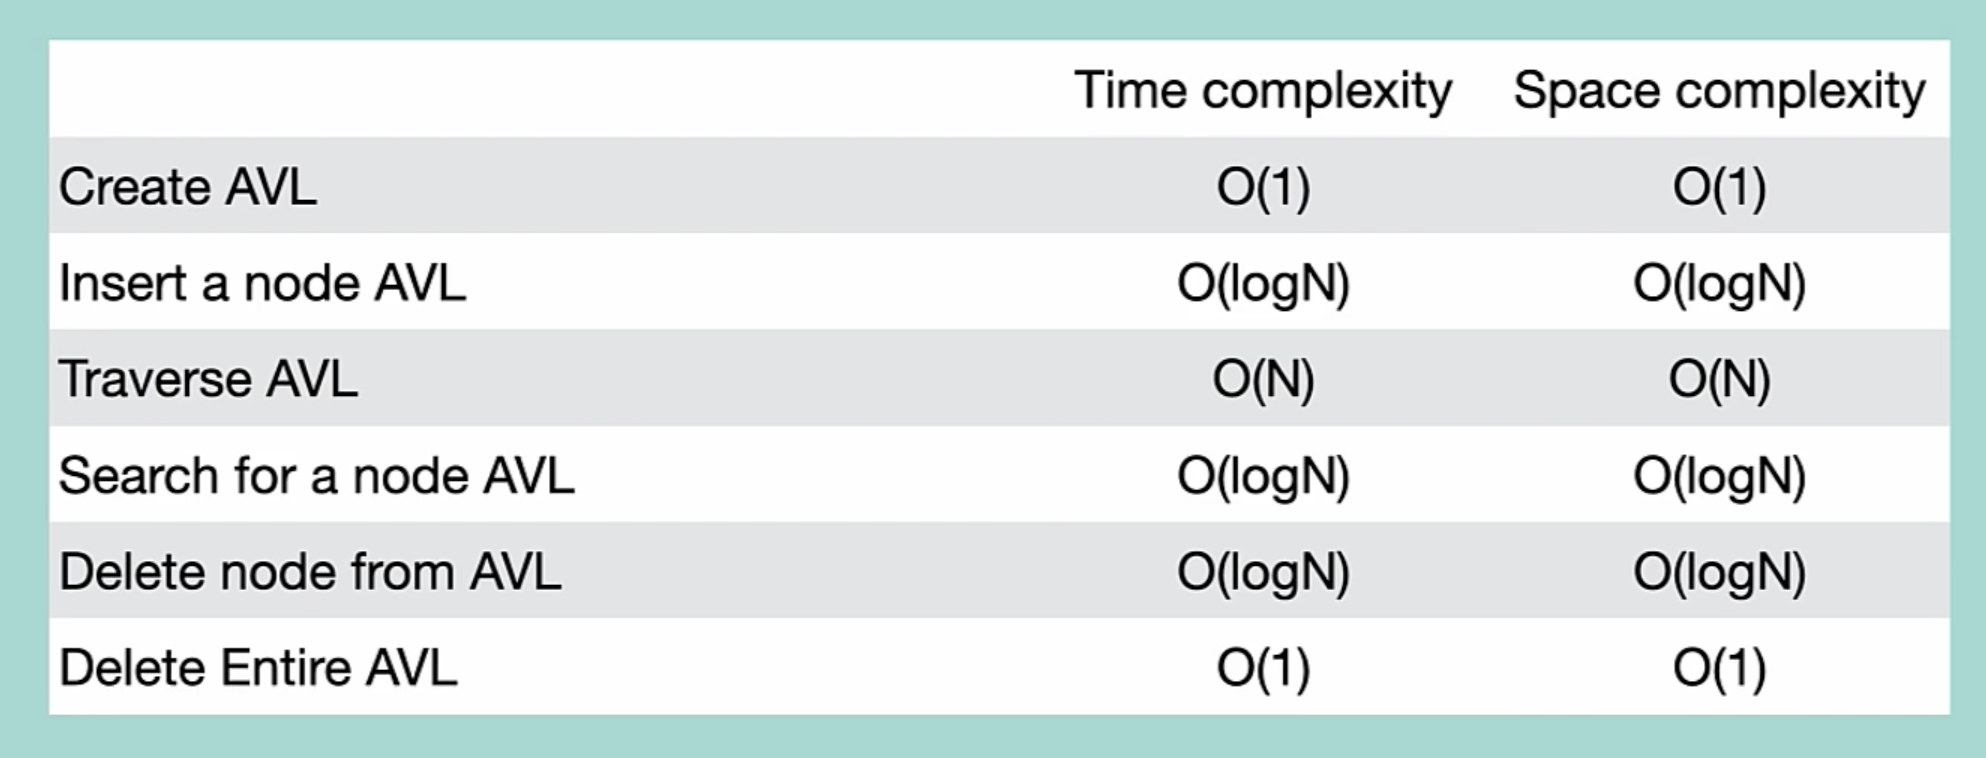